In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, read_csv_from_web
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `t>H+b>taunu` [1903.04560](https://arxiv.org/abs/1903.04560)

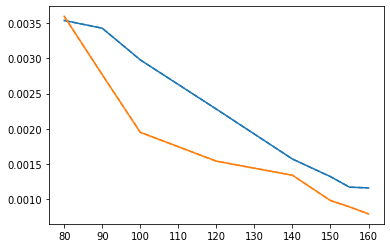

Looks good. Saving this to brtHpb_LHC13_CMS_36.json


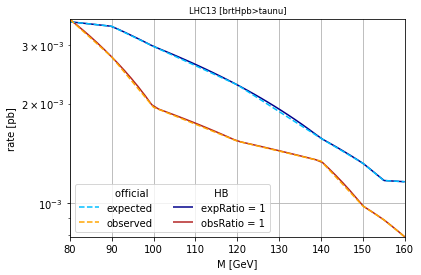

In [2]:
df = pd.DataFrame(
    {
        "m": [80, 90, 100, 120, 140, 150, 155, 160],
        "obs": [3.6e-3, 2.77e-3, 1.95e-3, 1.54e-3, 1.34e-3, 9.8e-4, 8.9e-4, 7.9e-4],
        "exp": [3.54e-3, 3.43e-3, 2.98e-3, 2.28e-3, 1.57e-3, 1.32e-3, 1.17e-3, 1.16e-3],
    }
)
limitFile = implementChannelLimit(
    "1903.04560",
    {"channels": [["brtHpb", "taunu"]]},
    "https://doi.org/10.17182/hepdata.90687.v1/t2",
    df,
    idSuffix=2,
    massResolution=resolution.taunu["tauh"],
    constraints={"topDecayConsistency": ["brtHpb"]},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp>tH+>taunu` [1903.04560](https://arxiv.org/abs/1903.04560)

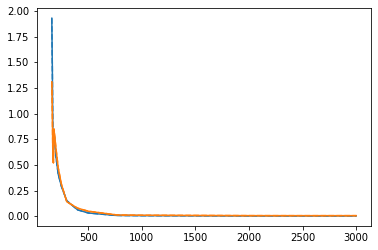

Looks good. Saving this to Hpmtb_LHC13_CMS_36.json


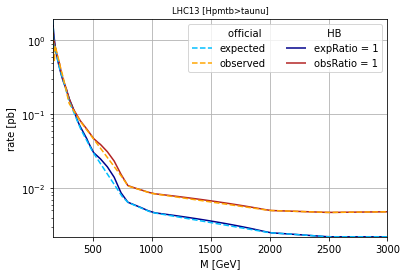

In [3]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1724676/Limit%2013%20TeV%20on%20xsec%20times%20BR%20for%20H+/-%20to%20tau-nu/1/csv",
    comment="#",
    skiprows=65,
    names=["m", "exp", "unc+", "unc-"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1724676/Limit%2013%20TeV%20on%20xsec%20times%20BR%20for%20H+/-%20to%20tau-nu/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=91 - 34,
    engine="python",
    names=["m", "obs"],
)

assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp
# masses below 170 GeV assume ttbar production and are covered above
# include the 160 and 165 GeV datapoint anyway to avoid an artificial gap in-between
df = df.loc[df.m >= 160].reset_index(drop=True)

limitFile = implementChannelLimit(
    "1903.04560",
    {"channels": [["Hpmtb", "taunu"]]},
    "https://doi.org/10.17182/hepdata.90687.v1/t1",
    df,
    idSuffix=1,
    massResolution=resolution.taunu["tauh"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# CMS 8TeV LHC

## `t>H+b>taunu` run 1 [1508.07774](https://arxiv.org/abs/1508.07774)


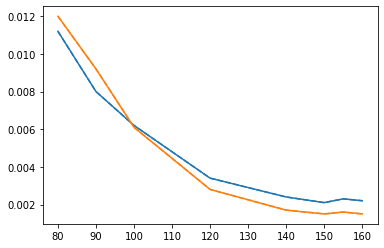

Looks good. Saving this to brtHpb_LHC8_CMS_20.json


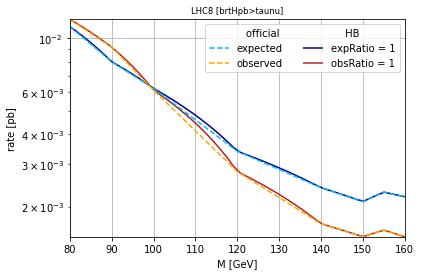

In [4]:
df = pd.DataFrame(
    {
        "m": [80, 90, 100, 120, 140, 150, 155, 160],
        "obs": [1.2e-2, 9.2e-3, 6.1e-3, 2.8e-3, 1.7e-3, 1.5e-3, 1.6e-3, 1.5e-3],
        "exp": [1.12e-2, 8e-3, 6.2e-3, 3.4e-3, 2.4e-3, 2.1e-3, 2.3e-3, 2.2e-3],
    }
)
limitFile = implementChannelLimit(
    "1508.07774",
    {"channels": [["brtHpb", "taunu"]]},
    "Fig. 8 (left)/Tab. 10",
    df,
    idSuffix=1,
    luminosity=19.7,
    massResolution=resolution.taunu["tauh"],
    constraints={"topDecayConsistency": ["brtHpb"]},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp>tH+>taunu` run 1 [1508.07774](https://arxiv.org/abs/1508.07774)


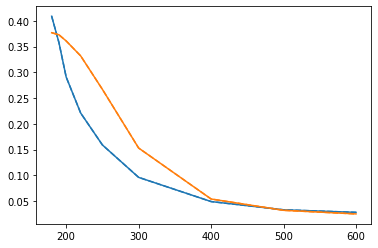

Looks good. Saving this to Hpmtb_LHC8_CMS_20.json


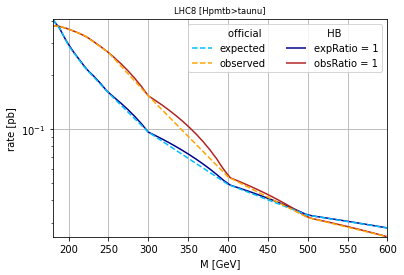

In [5]:
df = pd.DataFrame(
    {
        "m": [180, 190, 200, 220, 250, 300, 400, 500, 600],
        "obs": [0.377, 0.373, 0.361, 0.332, 0.267, 0.153, 0.054, 0.032, 0.025],
        "exp": [0.409, 0.358, 0.291, 0.221, 0.159, 0.096, 0.049, 0.033, 0.028],
    }
)
limitFile = implementChannelLimit(
    "1508.07774",
    {"channels": [["Hpmtb", "taunu"]]},
    "Fig. 8 (right)/Tab. 10",
    df,
    idSuffix=2,
    luminosity=19.7,
    massResolution=resolution.taunu["tauh"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
